In [1]:
from dlroms import *
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
import torch
from IPython.display import clear_output as clc

In [2]:
domain = fe.rectangle((0.0, 0.0), (1.0, 1.0)) # - fe.rectangle((0.3, 0.3), (0.7, 0.7))
mesh = fe.mesh(domain, stepsize=0.05)
clc()

In [4]:
# Load train and test data

snapshots_dir = './snapshots/'

K_data = np.load(snapshots_dir+'K.npy')
p_data = np.load(snapshots_dir+'p.npy')

N_train = int(0.8 * K_data.shape[0])
N_test = K_data.shape[0] - N_train

K_train = torch.tensor(K_data[:N_train], dtype=torch.float)
p_train = torch.tensor(p_data[:N_train], dtype=torch.float)

K_test = torch.tensor(K_data[N_train:], dtype=torch.float)
p_test = torch.tensor(p_data[N_train:], dtype=torch.float)


In [9]:
print(K_train.shape)
print(K_test.shape)

torch.Size([80, 441])
torch.Size([20, 441])


In [22]:
# Train network

V = fe.space(mesh, 'CG', 1)

layer = Local(V, V, support=0.1)

model = DFNN(layer, layer, layer)
model.He()

model.train(K_train, p_train, ntrain=N_train, epochs=100, loss=mse(euclidean), verbose=True)

		Train		Test
Epoch 100:	9.98e-02	nan.

>> ETA: 0.38s.

Training complete. Elapsed time: 37.82 seconds.


In [23]:
# Generate predictions

model.eval()

with torch.no_grad():
  p_pred = model(K_test)

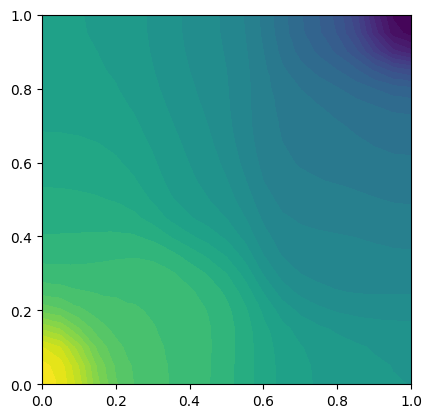

In [29]:
idx = 10
p_fun = Function(V)
p_fun.vector()[:] = p_test[idx]
plot(p_fun)

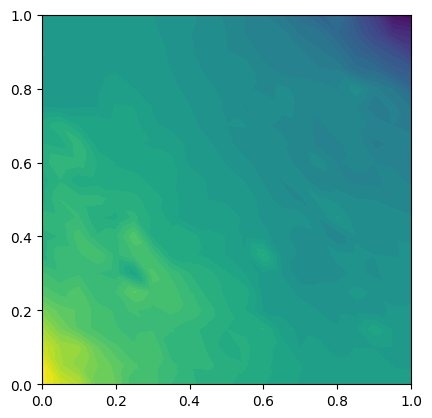

In [30]:
p_fun_pred = Function(V)
p_fun_pred.vector()[:] = p_pred[idx]
plot(p_fun_pred)

- Spazi funzionali? (layer da spazio fine a coarse o viceversa)
- Numero di layer?
- Supporto?
- Perché rete sparsa? (source localizzata in spazio)
- Vantaggio rispetto a rete densa? (comparable accuracy with fewer weights)
- Come quantificare errore? (pointwise difference)